# Wiki scraper and data analysis

In [23]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [3]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_highest-grossing_films')[0]

In [4]:
# First check the data

df

,Rank,Peak,Title,Worldwide gross,Year,Ref
0,1,1,Avatar,"$2,923,706,026",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,3,Avatar: The Way of Water,"$2,320,250,281",2022,[# 5][# 6]
3,4,1,Titanic,"T$2,257,844,554",1997,[# 7][# 8]
4,5,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 9][# 10]
5,6,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 11][# 12]
6,7,6,Spider-Man: No Way Home,"$1,922,598,800",2021,[# 13][# 14]
7,8,8,Inside Out 2 †,"$1,697,092,880",2024,[# 15]
8,9,3,Jurassic World,"$1,671,537,444",2015,[# 16][# 17]
9,10,7,The Lion King,"$1,656,943,394",2019,[# 18][# 4]


In [5]:
# Check what data types we are working with

df.dtypes

Rank                int64
Peak               object
Title              object
Worldwide gross    object
Year                int64
Ref                object
dtype: object

## Data Cleaning and Formatting

In [6]:
# remove the 'Ref' column as this has no relevance to the data we are analysing

df = df.drop('Ref', axis=1)

In [7]:
# remove any non-numeric values from worldwide gross / peak / rank and convert to integers

def clean_rank_peak(value):
    # Convert to string and remove non-numeric characters
    numeric_string = re.sub(r'\D', '', str(value))
    # Convert to an integer if possible, else return NaN for empty strings
    return int(numeric_string) if numeric_string else pd.NA

# Worldwide gross is a bit different as one value has a number before the '$' which causes problems

def clean_worldwide_gross(value):
    # Extract numeric part after the last '$', remove non-numeric characters, and convert to integer
    numeric_string = re.sub(r'[^0-9]', '', str(value).split('$')[-1])
    return int(numeric_string) if numeric_string else pd.NA

# Apply the cleaning function to each column of interest
df[['Rank', 'Peak']] = df[['Rank', 'Peak']].apply(lambda col: col.map(clean_rank_peak)).astype('Int64')
df['Worldwide gross'] = df['Worldwide gross'].apply(clean_worldwide_gross)

In [8]:
# As you can see, we now have every column as the correct data type

df.dtypes

Rank                Int64
Peak                Int64
Title              object
Worldwide gross     int64
Year                int64
dtype: object

In [9]:
# remove the '†' symbols from any of the title names, these are wikipedia references

df['Title'] = df['Title'].apply(lambda x: re.sub(r'†','',x))

In [10]:
# now that the data is clean we can work with it, so I am creating a new variable for the clean data
clean_df = df
clean_df.head(15)

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avatar,2923706026,2009
1,2,1,Avengers: Endgame,2797501328,2019
2,3,3,Avatar: The Way of Water,2320250281,2022
3,4,1,Titanic,2257844554,1997
4,5,3,Star Wars: The Force Awakens,2068223624,2015
5,6,4,Avengers: Infinity War,2048359754,2018
6,7,6,Spider-Man: No Way Home,1922598800,2021
7,8,8,Inside Out 2,1697092880,2024
8,9,3,Jurassic World,1671537444,2015
9,10,7,The Lion King,1656943394,2019


## Data Visualisation

In [11]:
# Create a top 10 descending dataframe for the worldwide gross

top_10_df = df.sort_values(by='Worldwide gross', ascending=False).head(10)

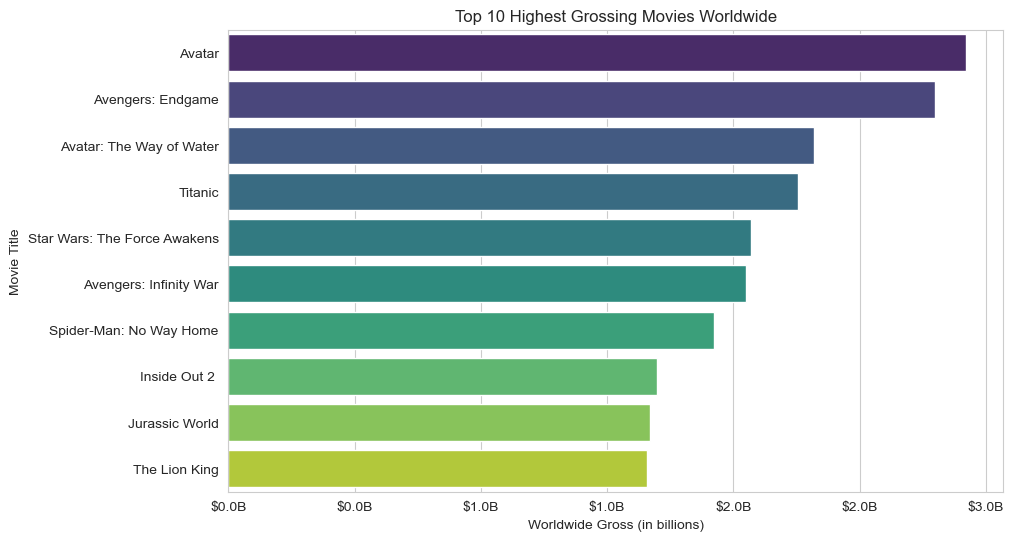

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Worldwide gross', y='Title', data=top_10_df, hue='Title', palette='viridis', legend=False)
plt.xlabel('Worldwide Gross (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Grossing Movies Worldwide')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x // 1_000_000_000}B'))
plt.show()

As seen from the visualisation above, Avatar is the best selling movie of all time.
Let's workout how much these films have made, compared to how many years they have been out.

In [13]:
# The year at the time of writing this is 2024, so we will base it off this year.
# We will first need a new column that represents how many years the films have been out

year_and_gross = top_10_df.drop(columns=['Rank', 'Peak'])
year_and_gross['Years since release'] = 2024 - year_and_gross['Year']
year_and_gross

,Title,Worldwide gross,Year,Years since release
0,Avatar,2923706026,2009,15
1,Avengers: Endgame,2797501328,2019,5
2,Avatar: The Way of Water,2320250281,2022,2
3,Titanic,2257844554,1997,27
4,Star Wars: The Force Awakens,2068223624,2015,9
5,Avengers: Infinity War,2048359754,2018,6
6,Spider-Man: No Way Home,1922598800,2021,3
7,Inside Out 2,1697092880,2024,0
8,Jurassic World,1671537444,2015,9
9,The Lion King,1656943394,2019,5


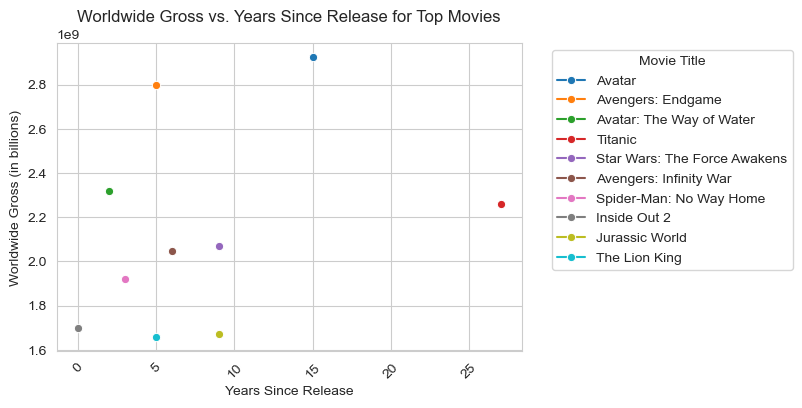

In [14]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=year_and_gross, x="Years since release", y="Worldwide gross", hue="Title", marker="o")

# Set labels and title
plt.xlabel("Years Since Release")
plt.ylabel("Worldwide Gross (in billions)")
plt.title("Worldwide Gross vs. Years Since Release for Top Movies")
plt.xticks(rotation=45)
plt.legend(title='Movie Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

As we can see from the graph, Avengers: Endgame looks as though it has done the best in the shortest time.
Lets find out how much the movies have made per year on average since their release

In [15]:
# Workout the average gross by dividing the worldwide gross by the years since release
# If the film hasn't been out for more than 1 year, replace the average gross with the worldwide gross
year_and_gross['Average gross per year'] = year_and_gross.apply(
    lambda x: x['Worldwide gross'] if x['Years since release'] == 0 else x['Worldwide gross'] / x['Years since release'], axis=1)

year_and_gross['Average gross per year'] = year_and_gross['Average gross per year'].astype(int)
year_and_gross

,Title,Worldwide gross,Year,Years since release,Average gross per year
0,Avatar,2923706026,2009,15,194913735
1,Avengers: Endgame,2797501328,2019,5,559500265
2,Avatar: The Way of Water,2320250281,2022,2,1160125140
3,Titanic,2257844554,1997,27,83623872
4,Star Wars: The Force Awakens,2068223624,2015,9,229802624
5,Avengers: Infinity War,2048359754,2018,6,341393292
6,Spider-Man: No Way Home,1922598800,2021,3,640866266
7,Inside Out 2,1697092880,2024,0,1697092880
8,Jurassic World,1671537444,2015,9,185726382
9,The Lion King,1656943394,2019,5,331388678


There is the possibility that the film hasn't been out for more than 1 year, in this case, Inside Out 2 hasn't.
Therefore we will populate the average gross per year with the worldwide gross.

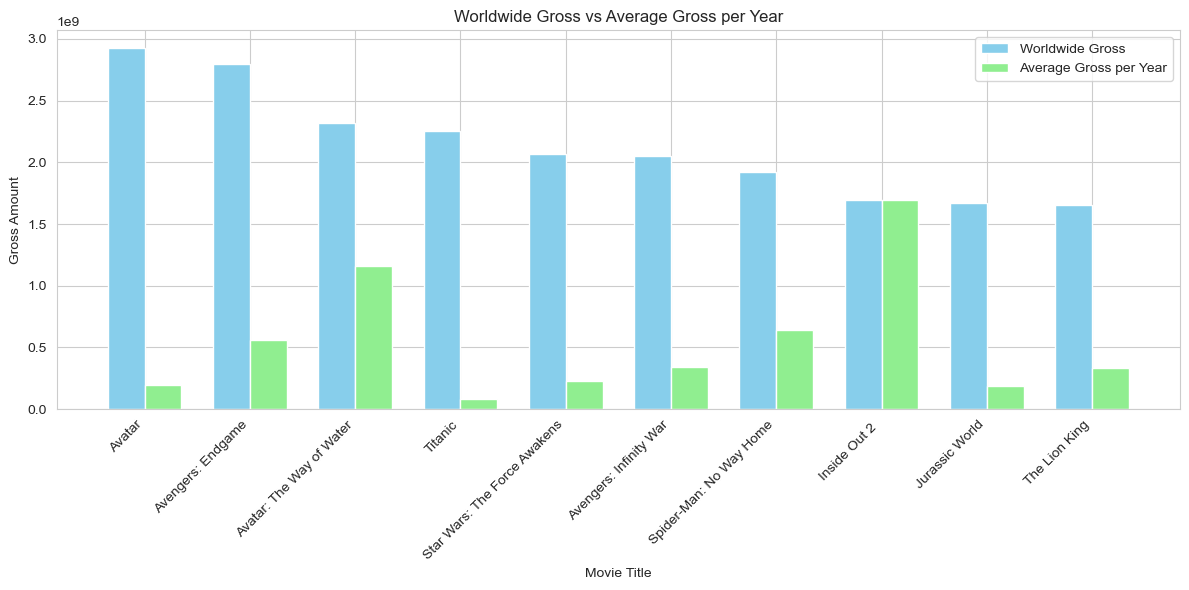

In [16]:
# Set figure size
plt.figure(figsize=(12, 6))

# Set the bar width
bar_width = 0.35

# Set the index for the x-axis
x = range(len(year_and_gross))

# Create the bars for Worldwide Gross
plt.bar(x, year_and_gross['Worldwide gross'], width=bar_width, label='Worldwide Gross', color='skyblue')

# Create the bars for Average Gross per Year
plt.bar([i + bar_width for i in x], year_and_gross['Average gross per year'], width=bar_width, label='Average Gross per Year', color='lightgreen')

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Gross Amount')
plt.title('Worldwide Gross vs Average Gross per Year')
plt.xticks([i + bar_width / 2 for i in x], year_and_gross['Title'], rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Here we can see the movies ranked by Worldwide Gross

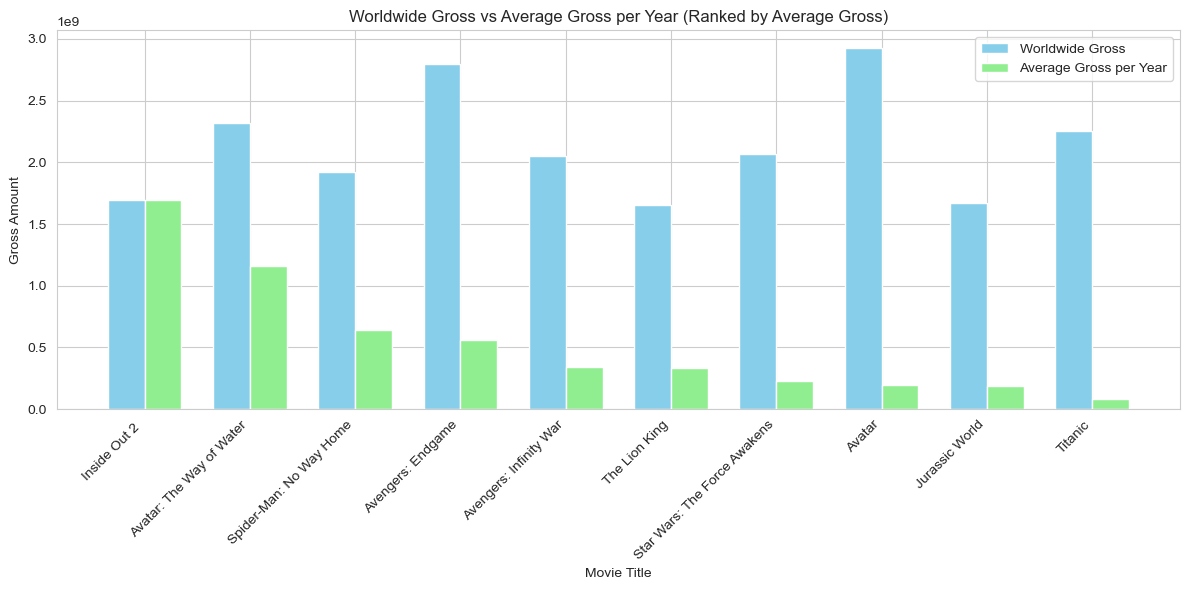

In [17]:
# Sort the DataFrame by Average Gross per Year in descending order
year_and_gross_sorted = year_and_gross.sort_values(by='Average gross per year', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Set the bar width
bar_width = 0.35

# Set the index for the x-axis
x = range(len(year_and_gross_sorted))

# Create the bars for Worldwide Gross
plt.bar(x, year_and_gross_sorted['Worldwide gross'], width=bar_width, label='Worldwide Gross', color='skyblue')

# Create the bars for Average Gross per Year
plt.bar([i + bar_width for i in x], year_and_gross_sorted['Average gross per year'], width=bar_width, label='Average Gross per Year', color='lightgreen')

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Gross Amount')
plt.title('Worldwide Gross vs Average Gross per Year (Ranked by Average Gross)')
plt.xticks([i + bar_width / 2 for i in x], year_and_gross_sorted['Title'], rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Here we can see the movies ranked by Average Gross

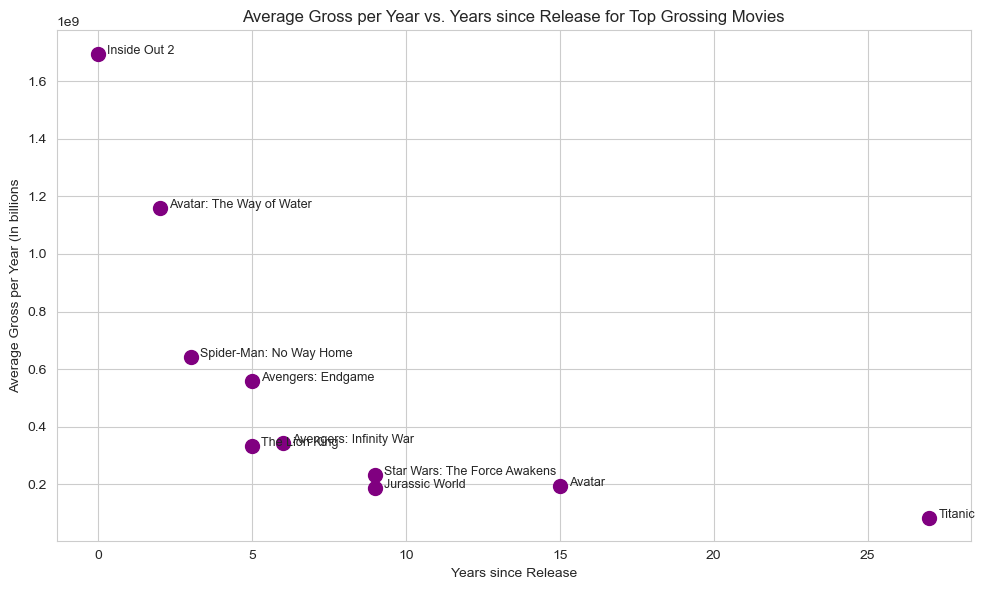

In [27]:
# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot of Years since release vs. Average gross per year
plt.scatter(year_and_gross['Years since release'], year_and_gross['Average gross per year'], color='purple', s=100)

# Add movie titles next to each point for easy identification
for i, title in enumerate(year_and_gross['Title']):
    plt.text(year_and_gross['Years since release'][i] + 0.3, year_and_gross['Average gross per year'][i], title, fontsize=9)

# Set labels and title
plt.xlabel('Years since Release')
plt.ylabel('Average Gross per Year (In billions')
plt.title('Average Gross per Year vs. Years since Release for Top Grossing Movies')

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion

After looking at the 2 bar charts (Worldwide Gross vs Average Gross per Year) and (Worldwide Gross vs Average Gross per Year (Ranked by Average Gross)
you would think that Inside Out 2 is doing a lot better than the rest.

But if we take this scatter diagram, you can clearly see that there is a correlation between how long the film has been out and how much average gross it makes per year, showing that the longer the film has been out, the less it has made on average per year.

Some other information we can gather from this analysed data shows that the Avatar movies and the Avenger movies both seem to do very well. In this chart, Inside Out 2 may be considered an anomoly due to it not being out for a full year.